In [ ]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import *
import math
import time

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder  # crear una columna categórica en formato numérico
from sklearn.preprocessing import MultiLabelBinarizer


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_validate  # utilizar cross_validate cuando necesite múltiples métricas de rendimiento, tiempos de ajuste y tiempos de puntuación
from sklearn.model_selection import cross_val_score  # utilizar cross_val_score cuando esté interesado en una única métrica de rendimiento y desee una matriz simple de puntuaciones

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor  # utilizar DecisionTreeRegressor para tareas de regresión en las que desee predecir valores numéricos continuos
from sklearn.tree import DecisionTreeClassifier # utilizar DecisionTreeClassifier para tareas de clasificación en las que desee predecir etiquetas de clase discretas


from sklearn import metrics
from sklearn.metrics import r2_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Leer Dataset
df = pd.read_csv('default of credit card clients.csv')
df.shape

(30000, 25)

**Resumen**


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### Filas y columnas

In [ ]:
# reucento de columnas y filas
print('Numero de filas :' , df.shape[0] )
print('Numero de columnas :' , df.shape[1] )

Numero de filas : 30000
Numero de columnas : 25


## **Descripcion de los datos**

In [ ]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
#informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#columnas del dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [ ]:
#1era fila
df.iloc[0,:]

,0
ID,1
LIMIT_BAL,20000
SEX,2
EDUCATION,2
MARRIAGE,1
AGE,24
PAY_0,2
PAY_2,2
PAY_3,-1
PAY_4,-1


# **Limpieza de datos**

### **Checar valores nulos**

In [ ]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
df.isna().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


Sin datos nulos en el dataset

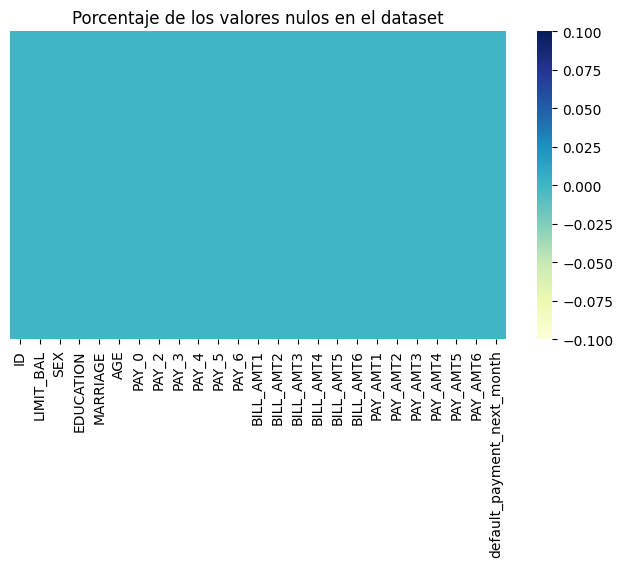

In [ ]:
#Grafica para ver los datos nulos
plt.figure(figsize = (8,4))
sns.heatmap(df.isnull() , cbar = True , yticklabels = False,cmap='YlGnBu')
plt.title('Porcentaje de los valores nulos en el dataset')
plt.show()

In [ ]:
#ver si hay duplicados
len(df[df.duplicated()])

0

***No se encuentran valores faltantes o nulos ni duplicados en el dataset.***

**Tenemos registros de 30000 clientes. Esta es la informacion de los datos dada por la pagina donde se encuentra el dataset:** https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients


***ID:*** ID de cada cliente

***LIMIT_BAL:*** Monto del crédito otorgado en dólares NT (incluye crédito individual y familiar/suplementario)

***SEXO:*** Género (1 = hombre, 2 = mujer)

***EDUCACIÓN:*** (1 = posgrado, 2 = universidad, 3 = escuela secundaria, 0,4,5,6 = otros)

***MATRIMONIO:*** Estado civil (0 = otros, 1 = casado, 2 = soltero, 3 = otros)

***EDAD:*** Edad en años

**Historial de pagos anteriores**

La escala de medición para el estado de pago es: -1 = pago debido; 1 = retraso en el pago durante un mes; 2 = retraso en el pago durante dos meses; . . .; 8 = retraso en el pago durante ocho meses; 9 = retraso en el pago durante nueve meses o más.***

**PAY_0**: Estado de prestamo en septiembre de 2005

**PAY_2:** Estado de prestamo en agosto de 2005

**PAY_3:** Estado de prestamo en julio de 2005

**PAY_4:** Estado de prestamo en junio de 2005

**PAY_5:** Estado de prestamo en mayo de 2005

**PAY_6**: Estado de prestamo en abril de 2005

**Monto del estado de cuenta (NT dollar)**

**BILL_AMT1**: Monto del estado de cuenta en septiembre de 2005 (dólares NT)

**BILL_AMT2**: Monto del estado de cuenta en agosto de 2005 (dólares NT)

**BILL_AMT3:** Monto del estado de cuenta en julio de 2005 (dólares NT)

**BILL_AMT4:** Monto del estado de cuenta en junio de 2005 (dólares NT)

**BILL_AMT5:** Monto del estado de cuenta en mayo de 2005 (dólares NT)

**BILL_AMT6:** Monto del estado de cuenta en abril de 2005 (dólares NT)


**Monto del pago previo (NT dollar)**

**PAY_AMT1**: Monto del pago anterior en septiembre de 2005 (dólares NT)

**PAY_AMT2**: Monto del pago anterior en agosto de 2005 (dólares NT)

**PAY_AMT3**: Monto del pago anterior en julio de 2005 (dólares NT)

**PAY_AMT4**: Monto del pago anterior en junio de 2005 (dólares NT)

**PAY_AMT5**: Monto del pago anterior en mayo de 2005 (dólares NT)

**PAY_AMT6**: Monto del pago anterior en abril de 2005 (dólares NT)

**default.payment.next.month**: Pago por defecto (1=sí, 0=no)

In [ ]:
# Maximo de facturas
df['LIMIT_BAL'].max()

1000000

In [ ]:
# Minimo de facturas
df['LIMIT_BAL'].min()

10000

## **Preprocesamiento de los datos**

***Cambie el nombre de algunas columnas para mejor entendimiento***

In [ ]:
#renombrar columnas
df.rename(columns = {'default_payment_next_month' : 'IsDefaulter'} , inplace = True)
df.rename(columns = {'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'} , inplace = True)
df.rename(columns = {'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'} , inplace = True)
df.rename(columns = {'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'} , inplace = True)


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Busqueda de valores atipicos mediante un Isolation Forest

In [ ]:
#Creacion de la instancia para minmaxsacler
minmax = MinMaxScaler(feature_range = (0,1))
scale_df = minmax.fit_transform(df.drop('IsDefaulter' ,axis = 1))

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
IsolationForest,
#Crear la instancia
clf = IsolationForest(n_estimators = 100,contamination = 0.01,random_state = 0)
clf.fit(scale_df)

IsolationForest(contamination=0.01, random_state=0)

In [ ]:
# Prediccion de las anomalias sin procesar
df['multivariate_anomaly_score'] = clf.decision_function(scale_df)

# Prediccion de un valor atipico o inlier de categoria de punto de datos

df['multivariate_outlier'] = clf.decision_function(scale_df)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,multivariate_anomaly_score,multivariate_outlier
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,0.179163,0.179163
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,0.203436,0.203436
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0.240266,0.240266
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0.239497,0.239497
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,0.177896,0.177896


#Analisis exploratorio de los datos e ingenieria de caracteristicas

### **IsDefaulter**

In [ ]:
#chequear la variable dependiente
df['IsDefaulter'].value_counts()

,count
IsDefaulter,
0,23364
1,6636


Text(0.5, 0, '0=Non defaulter, 1= Defaulter')

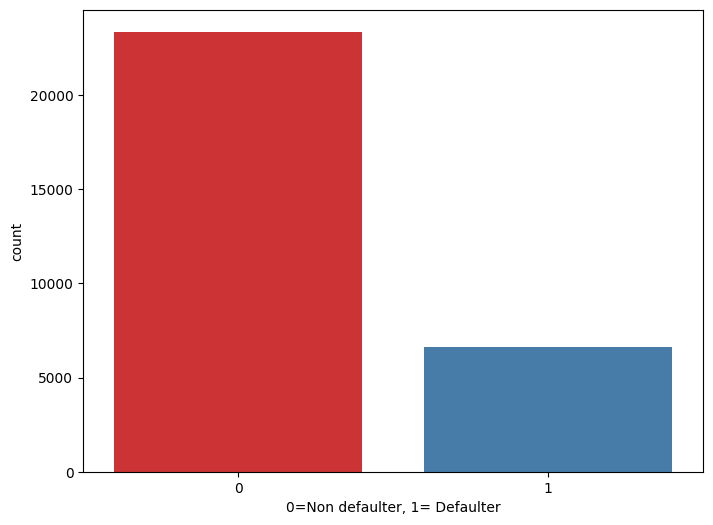

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x= 'IsDefaulter' , data = df , palette = 'Set1')
plt.xlabel("0=Non defaulter, 1= Defaulter")


*  0 - No predeterminado
* 1 - Predeterminado
Aquí podemos ver que los incumplidores son menores en comparación con los no incumplidores en el conjunto de datos dado.***
Y también podemos ver que ambas clases no están en proporción, es decir, tenemos un conjunto de datos desequilibrado.***


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,multivariate_anomaly_score,multivariate_outlier
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,0.179163,0.179163
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,0.203436,0.203436
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0.240266,0.240266
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0.239497,0.239497
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,0.177896,0.177896


## Analisis bivariado

In [ ]:
#Analisis de variables categoricas
categorical_features = ['SEX' , 'EDUCATION' , 'MARRIAGE']

In [ ]:
#Creacion de un df diferente para varaibles categoricas
df_cat = df[categorical_features]

In [ ]:
#ver la forma
df_cat.shape

(30000, 3)

In [ ]:
#analizando el df
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1


In [ ]:
#comprobacion de los recuntos de valores de categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

SEX
2    18112
1    11888
Name: count, dtype: int64

count of EDUCATION features

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

count of MARRIAGE features

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64



In [ ]:
#Asignación de valor numérico a categórico para facilitar la comprensión
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [ ]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,Female,university,married
1,Female,university,single
2,Female,university,single
3,Female,university,married
4,Male,university,married


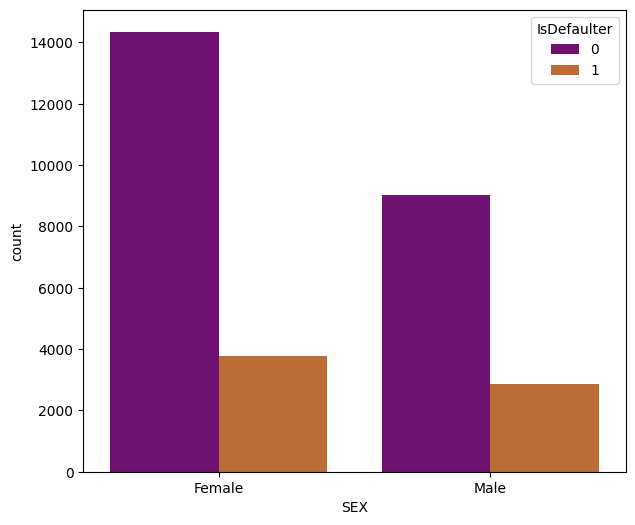

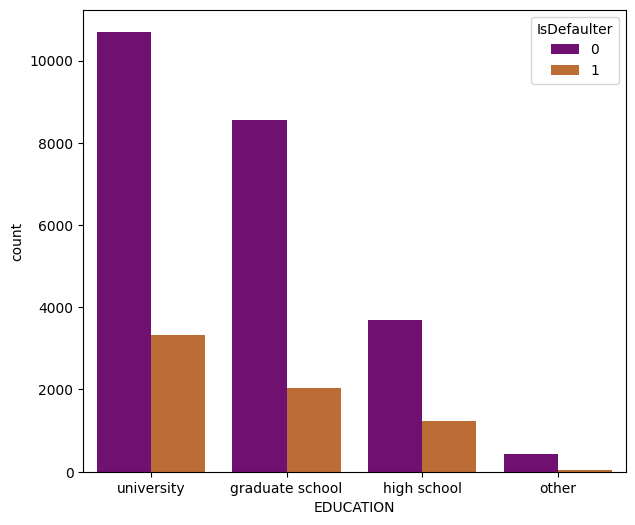

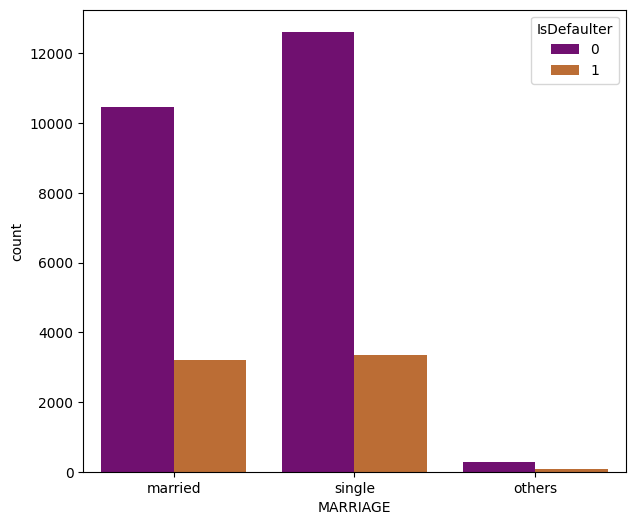

In [ ]:
for column_name in df_cat.columns:

  plt.figure(figsize = (7,6))
  sns.countplot(x = column_name , data = df_cat , hue = df['IsDefaulter'] , palette=['purple', 'chocolate'])
  plt.show()

In [ ]:
#creacion de la variable defaulter en df_cat
df_cat['IsDefaulter'] = df['IsDefaulter']

In [ ]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,IsDefaulter
0,Female,university,married,1
1,Female,university,single,1
2,Female,university,single,0
3,Female,university,married,0
4,Male,university,married,0


In [ ]:
#comprobación de la tasa de morosos de las categorías
for column_name in df_cat.columns[:-1]:
  print(df_cat[['IsDefaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  IsDefaulter
0  Female     0.207763
1    Male     0.241672
         EDUCATION  IsDefaulter
0  graduate school     0.192348
1      high school     0.251576
2            other     0.070513
3       university     0.237349
  MARRIAGE  IsDefaulter
0  married     0.234717
1   others     0.236074
2   single     0.209283


### observación
Para la función de sexo:
- Podemos ver que el número de mujeres es mayor que el de hombres
- Pero la proporción predeterminada de hombres es bastante más alta que la de mujeres

Para la función Educación:
- Los estudiantes universitarios y de bachillerato tienen más probabilidades de ser morosos en comparación con los estudiantes de posgrado.

Para la función de matrimonio:
- Las personas que no están casadas ni solteras tienen más probabilidades de incumplir con las facturas en comparación con las personas solteras y casadas.

In [ ]:
#descripcion de la variable edad
df['AGE'].describe(include='all')

,AGE
count,30000.000000
mean,35.485500
std,9.217904
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


### observacion
- Aqui podemos ver que la edad minima es 21 y la maxima 79

In [ ]:
# Conteo de valores de la columna de edad
df['AGE'].value_counts()

,count
AGE,
29,1605
27,1477
28,1409
30,1395
26,1256
31,1217
25,1186
34,1162
32,1158


In [ ]:

#creacion de una funcion para crear un conjunto por grupo de edad
def age_cohort(age):
  if age in range(21,31) : # empezando de 21 porque es el minimo de edad en el dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

In [ ]:
df['age_group'] = df['AGE'].apply(lambda x: age_cohort(x))

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,multivariate_anomaly_score,multivariate_outlier,age_group
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,0.179163,0.179163,21-30
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,0.203436,0.203436,21-30
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0.240266,0.240266,31-40
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0.239497,0.239497,31-40
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,0.177896,0.177896,51-60


In [ ]:
#recuento de age_group
df['age_group'].value_counts().sort_values(ascending = False)

,count
age_group,
21-30,11013
31-40,10713
41-50,6005
51-60,1997
60 & above,272


<Axes: xlabel='age_group', ylabel='count'>

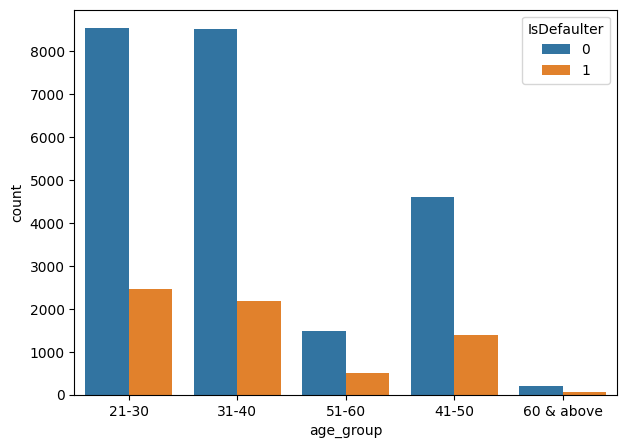

In [ ]:
#visualacion de age group
plt.figure(figsize = (7,5))
sns.countplot(x = df['age_group'].sort_values() , data = df , hue = 'IsDefaulter' )

### observacion:
- En nuestro conjunto de datos podemos ver claramente que la mayoría de los titulares de tarjetas de crédito tienen entre 21 y 40 años, por lo que podemos decir que el cliente objetivo de la empresa son en su mayoría jóvenes.


In [ ]:
#tasa de moross en age_group
df[['IsDefaulter','age_group']].groupby('age_group').mean().reset_index()

,age_group,IsDefaulter
0,21-30,0.224371
1,31-40,0.204331
2,41-50,0.232973
3,51-60,0.252379
4,60 & above,0.268382


### observacion
- Podemos ver claramente que a medida que aumenta la edad, las posibilidades de incumplimiento aumentan porque las personas de mayor edad tienen más tasa de incumplimiento

<Axes: xlabel='AGE', ylabel='count'>

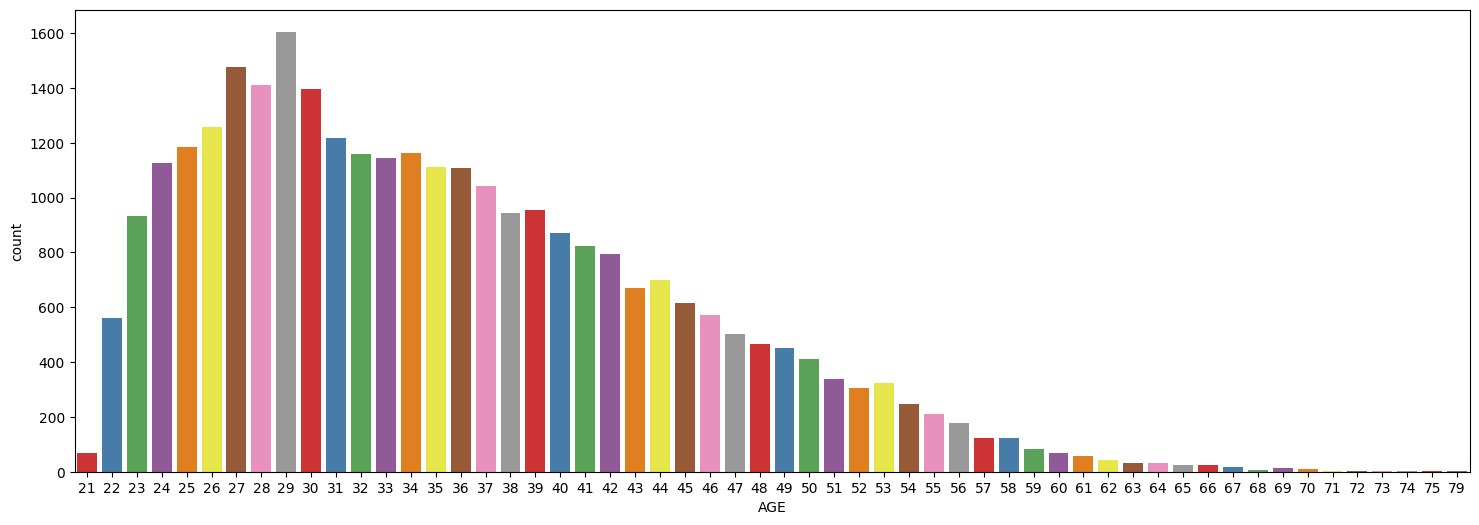

In [ ]:
# grafiuca del recuento indiviudal de la edad
plt.figure(figsize = (18,6))
sns.countplot(x = df['AGE'].sort_values(ascending = False) , data = df , palette = 'Set1')

Aqui se puede ver que la mayoria de los titulares de tarjeta de credito son jovenes

<Axes: xlabel='AGE', ylabel='count'>

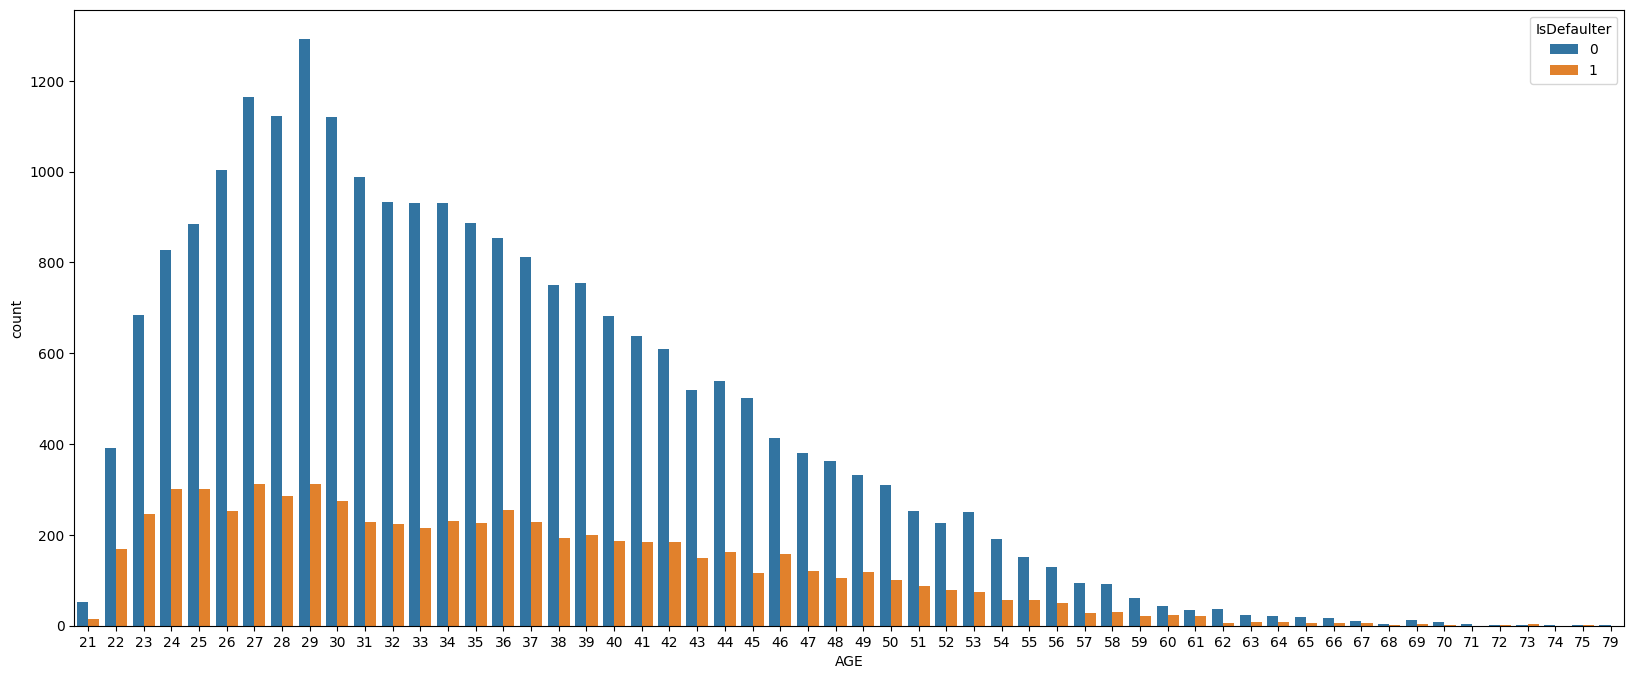

In [ ]:
#grafica de la cuenta de valores para age con respecto a isdefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

In [ ]:
# eliminar la columna de edad porque ya tenemos age_group
df = df.drop('AGE',axis= 1)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,multivariate_anomaly_score,multivariate_outlier,age_group
0,1,20000,2,2,1,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,0.179163,0.179163,21-30
1,2,120000,2,2,2,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,0.203436,0.203436,21-30
2,3,90000,2,2,2,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0.240266,0.240266,31-40
3,4,50000,2,2,1,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0.239497,0.239497,31-40
4,5,50000,1,2,1,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,0.177896,0.177896,51-60


In [ ]:
#descripción del retraso en el pago

df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
#descripcion del pago anterior
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
# descripcion del estado de cuenta
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

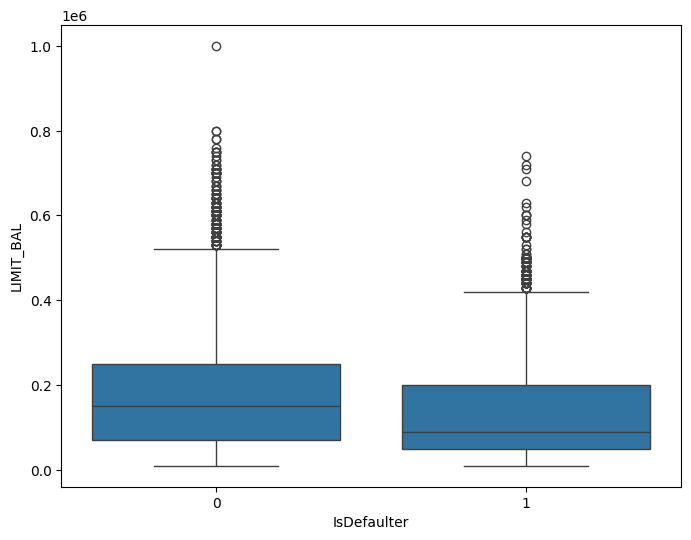

In [ ]:
plt.figure(figsize = (8,6))
sns.boxplot(x  = 'IsDefaulter' , y = "LIMIT_BAL" , data=df)

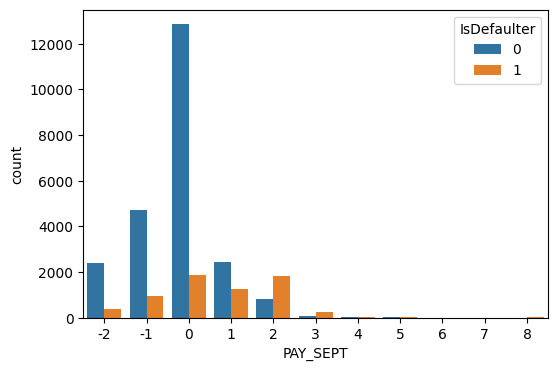

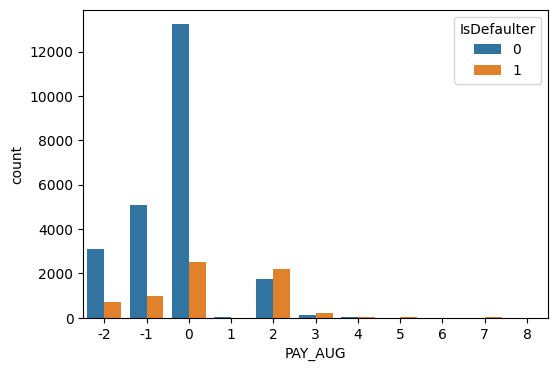

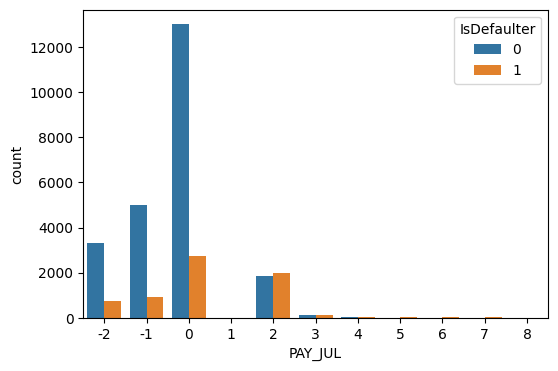

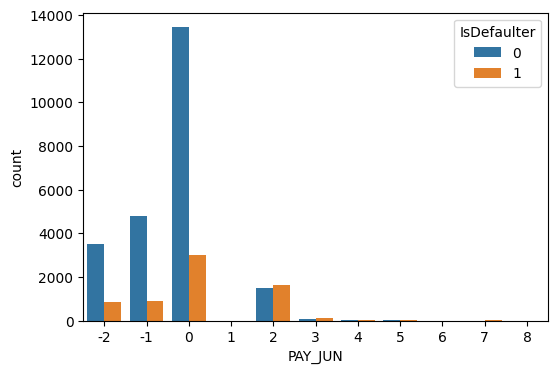

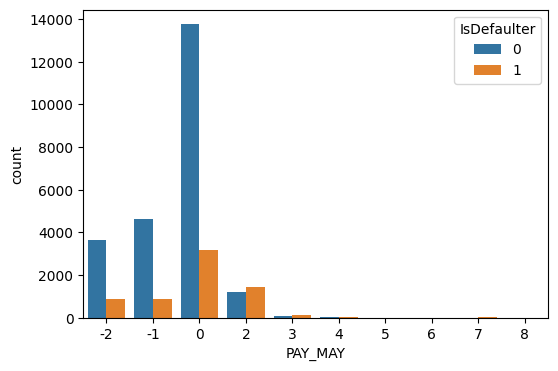

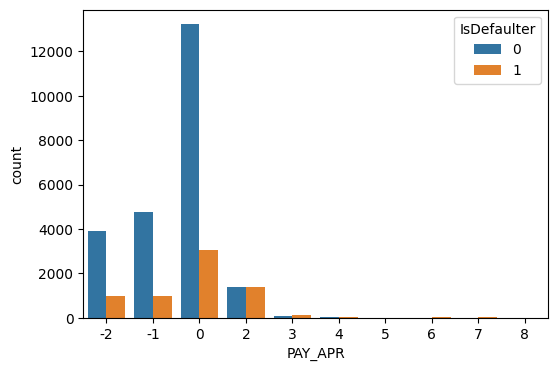

In [ ]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize = (6,4,))
  sns.countplot(x = col , hue = 'IsDefaulter' , data = df)

In [ ]:
#ver la info de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   PAY_SEPT                    30000 non-null  int64  
 6   PAY_AUG                     30000 non-null  int64  
 7   PAY_JUL                     30000 non-null  int64  
 8   PAY_JUN                     30000 non-null  int64  
 9   PAY_MAY                     30000 non-null  int64  
 10  PAY_APR                     30000 non-null  int64  
 11  BILL_AMT_SEPT               30000 non-null  int64  
 12  BILL_AMT_AUG                30000 non-null  int64  
 13  BILL_AMT_JUL                300

**ver la distribucion del monto de estado de cuetna de cada mes.**

**Age e Isdefaulter**

<Axes: xlabel='age_group', ylabel='IsDefaulter'>

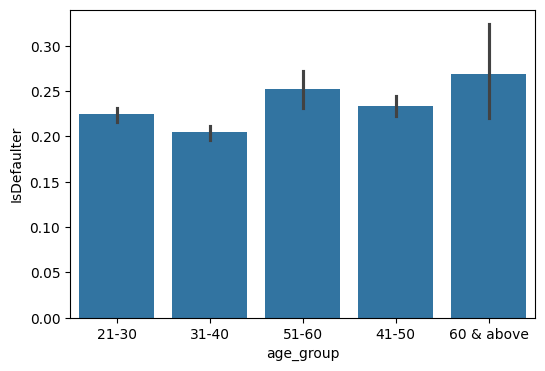

In [ ]:

plt.figure(figsize = (6,4))
sns.barplot(x = 'age_group' , y = 'IsDefaulter' , data = df)

* No hay tendencias significativas con respecto a la edad y los morosos
* Las edades de 60+ tienen una alta proporción predeterminada pero un tamaño de muestra muy bajo, por lo que no se puede sacar conclusiones precisas

<Figure size 1800x1000 with 0 Axes>

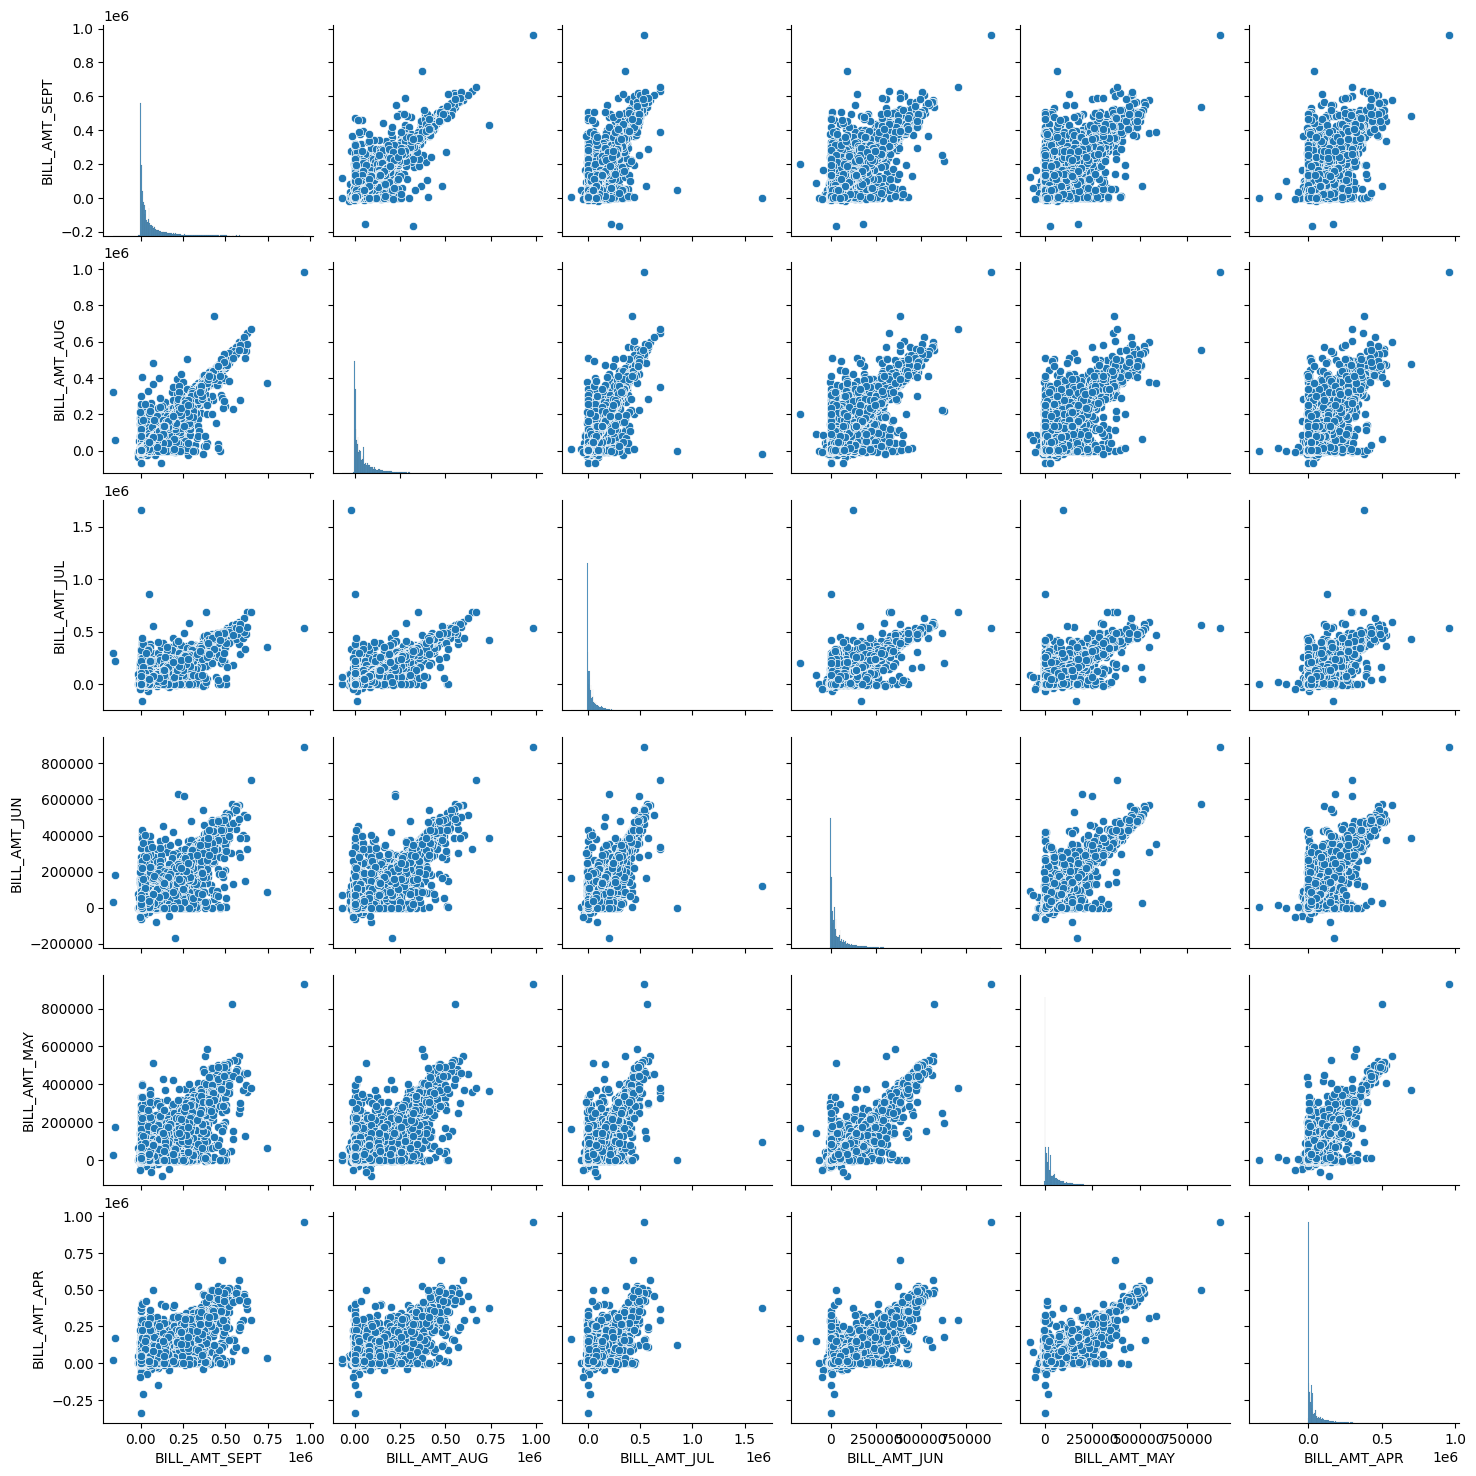

In [ ]:
bill_amnt_df = df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]
plt.figure(figsize = (18,10)),
sns.pairplot(data = bill_amnt_df)

* Este pairplot muestra la distribucion de los estados de cuenta del monto de la factura para cada mes para los incumplidores y los no morosos

**distribucion del monto del pago anterior para cada mes**

In [ ]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR']]

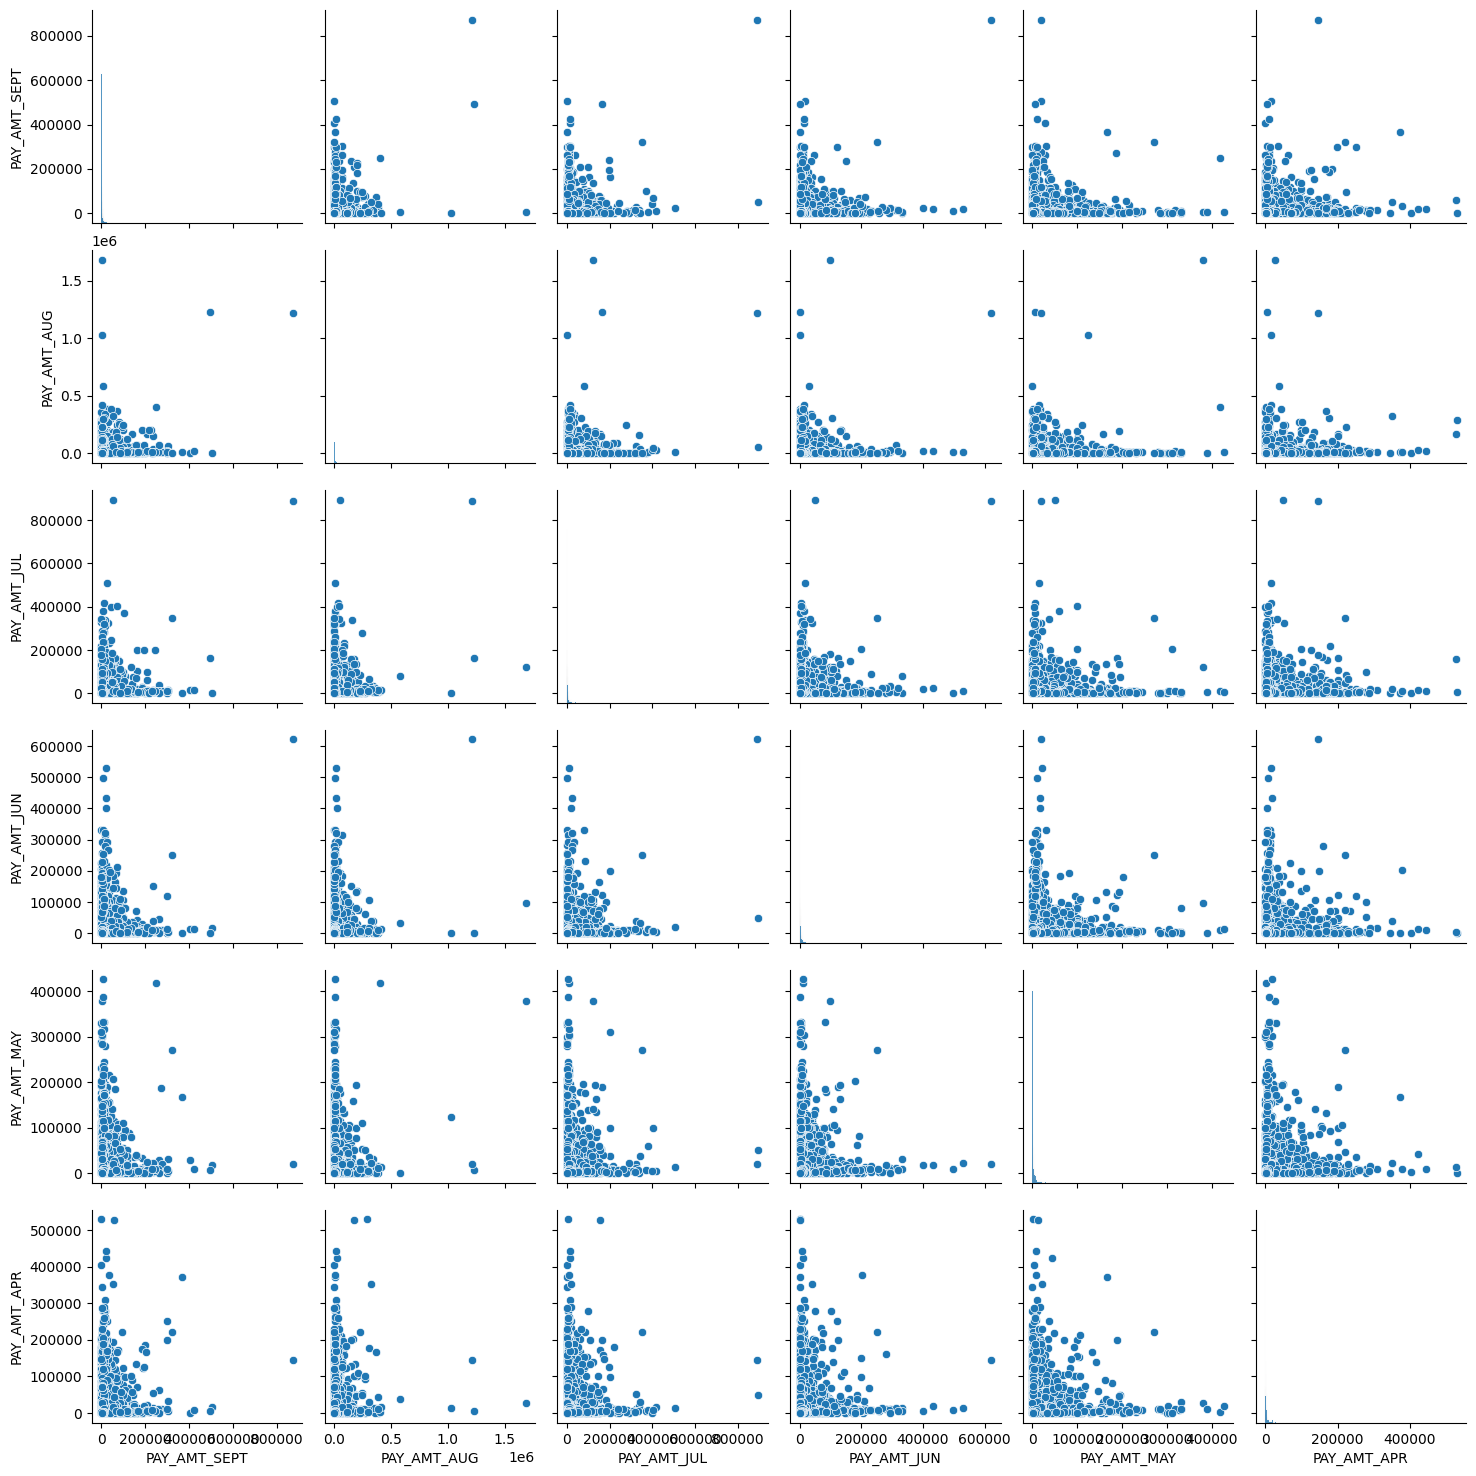

In [ ]:
sns.pairplot(data = pay_amnt_df)

* este pairplot muestra la distribucion del monto del pago para cada mes para los incumplidores y los no morosos

<Axes: >

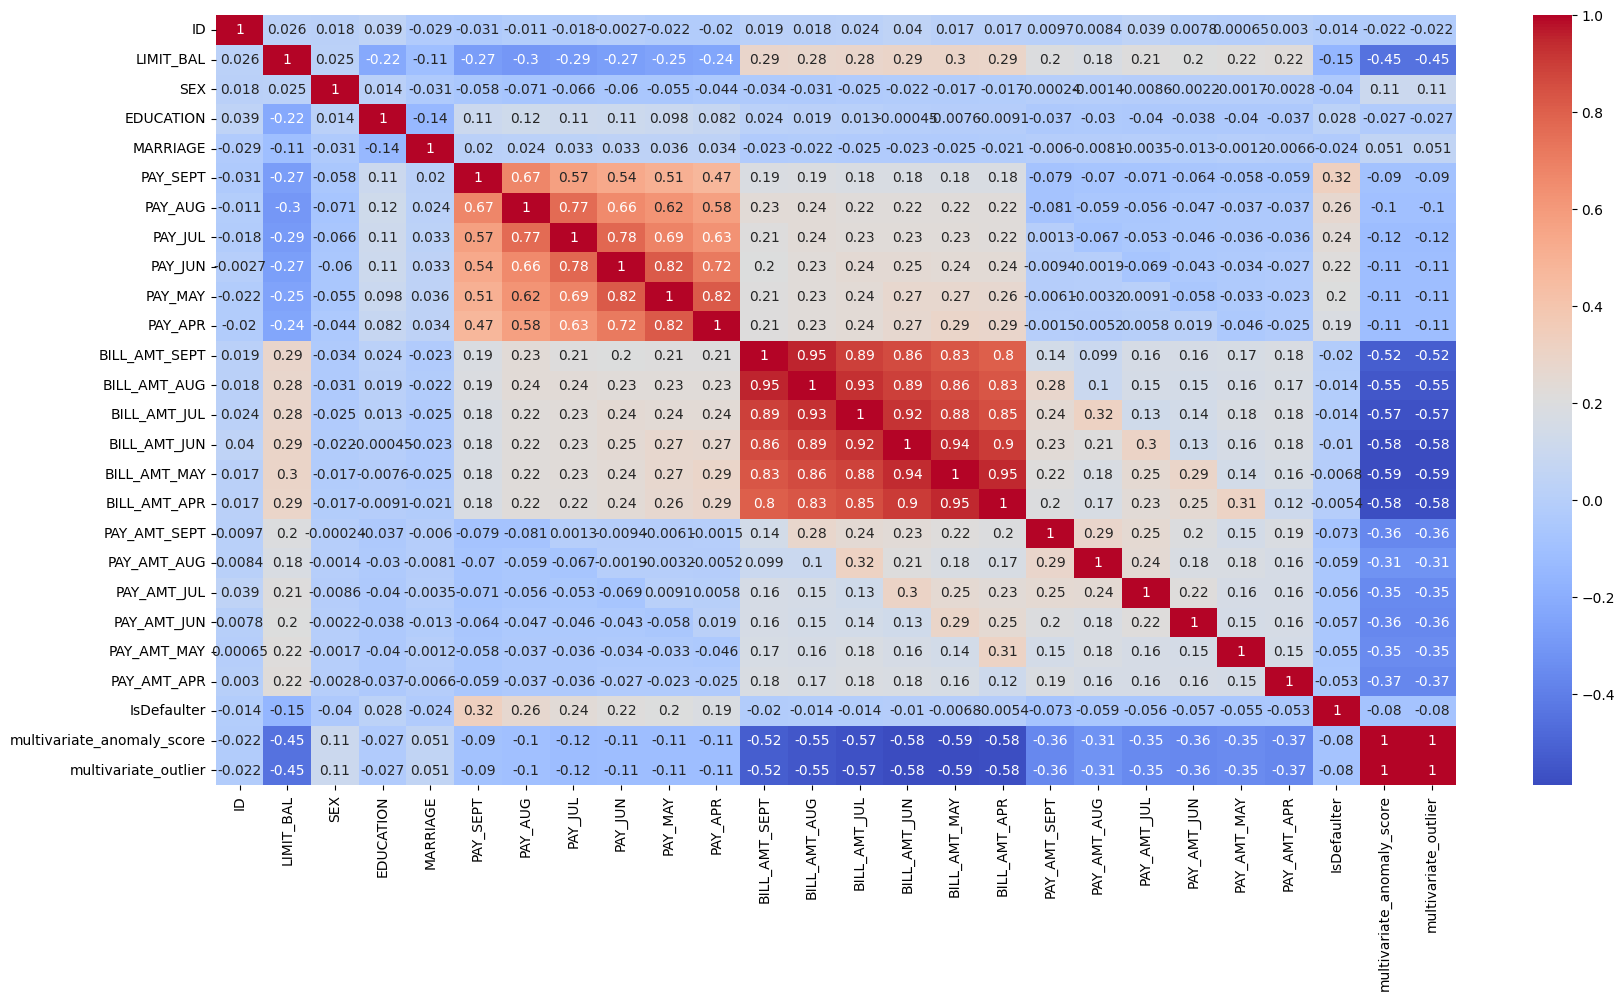

In [ ]:
plt.figure (figsize= (20,10))
corelation= df.select_dtypes(include=np.number).corr()
sns.heatmap(corelation, annot=True, cmap='coolwarm')

* Parece que hay algunas características correlacionadas negativamente, como el matrimonio, pero no puedo eliminar ciegamente esta característica porque podría ser una característica importante para la predicción
* El ID no es importante y no tiene ningún papel en la predicción, por lo que lo eliminare
* La edad y el matrimonio tampoco están correlacionados, por lo que también lo eliminare
* Tambien los datos de las facturas más antiguas son poco importantes, por lo que también los eliminaremos

## **Manejo del desequilibrio de clases**

### **SMOTE** ***- Synthetic Minority Oversampling Technique***

# Uso de SMOTE (técnica de sobremuestreo de minorías sintéticas) para remediar el desequilibrio en la columna dependiente

In [ ]:
#dividir la variable independiente
x = df.drop(['IsDefaulter','multivariate_anomaly_score','multivariate_outlier'] , axis = 1)

In [ ]:
#ver la variable dependiente
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,1,20000,2,2,1,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,21-30
1,2,120000,2,2,2,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,3,90000,2,2,2,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,4,50000,2,2,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,5,50000,1,2,1,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [ ]:
#asignación de valor numérico a categórico para facilitar la comprensión
x['SEX'] = x['SEX'].map({1:'Male' , 2:'Female'})
x['EDUCATION'] = x['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
x['MARRIAGE'] = x['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [ ]:
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,1,20000,Female,university,married,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,21-30
1,2,120000,Female,university,single,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,3,90000,Female,university,single,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,4,50000,Female,university,married,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,5,50000,Male,university,married,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [ ]:
# one-hot-encoding para age group
x = pd.get_dummies(x)

In [ ]:
x.head()

,ID,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,...,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,1,20000,2,2,-1,-1,-2,-2,3913,3102,...,False,True,True,False,False,True,False,False,False,False
1,2,120000,-1,2,0,0,0,2,2682,1725,...,False,True,False,False,True,True,False,False,False,False
2,3,90000,0,0,0,0,0,0,29239,14027,...,False,True,False,False,True,False,True,False,False,False
3,4,50000,0,0,0,0,0,0,46990,48233,...,False,True,True,False,False,False,True,False,False,False
4,5,50000,-1,0,-1,0,0,0,8617,5670,...,False,True,True,False,False,False,False,False,True,False


In [ ]:
#dividir la variable dependiente
y = df['IsDefaulter']

In [ ]:
df_final = x.copy()
df_final.head()

,ID,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,...,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,1,20000,2,2,-1,-1,-2,-2,3913,3102,...,False,True,True,False,False,True,False,False,False,False
1,2,120000,-1,2,0,0,0,2,2682,1725,...,False,True,False,False,True,True,False,False,False,False
2,3,90000,0,0,0,0,0,0,29239,14027,...,False,True,False,False,True,False,True,False,False,False
3,4,50000,0,0,0,0,0,0,46990,48233,...,False,True,True,False,False,False,True,False,False,False
4,5,50000,-1,0,-1,0,0,0,8617,5670,...,False,True,True,False,False,False,False,False,True,False


In [ ]:
df_final['IsDefaulter'] = df['IsDefaulter']

In [ ]:
df_final

,ID,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,...,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above,IsDefaulter
0,1,20000,2,2,-1,-1,-2,-2,3913,3102,...,True,True,False,False,True,False,False,False,False,1
1,2,120000,-1,2,0,0,0,2,2682,1725,...,True,False,False,True,True,False,False,False,False,1
2,3,90000,0,0,0,0,0,0,29239,14027,...,True,False,False,True,False,True,False,False,False,0
3,4,50000,0,0,0,0,0,0,46990,48233,...,True,True,False,False,False,True,False,False,False,0
4,5,50000,-1,0,-1,0,0,0,8617,5670,...,True,True,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,0,0,0,0,0,188948,192815,...,False,True,False,False,False,True,False,False,False,0
29996,29997,150000,-1,-1,-1,-1,0,0,1683,1828,...,False,False,False,True,False,False,True,False,False,0
29997,29998,30000,4,3,2,-1,0,0,3565,3356,...,True,False,False,True,False,True,False,False,False,1
29998,29999,80000,1,-1,0,0,0,-1,-1645,78379,...,False,True,False,False,False,False,True,False,False,1


In [ ]:
#importando SMOTE para equilibrar nuestro conjunto de datos
from imblearn.over_sampling import SMOTE
smote  = SMOTE()

# Predictor de ajuste
x_smote,y_smote = smote.fit_resample(x,y)


print('Tamaño del dataset original:' ,len(df))
print('Tamaño del dataset nuevo:' ,len(y_smote))

Tamaño del dataset original: 30000
Tamaño del dataset nuevo: 46728


In [ ]:
#Checando el recuento de las variables dependeintes despues del equilibrado
(unique,counts) = np.unique(y_smote , return_counts = True)
np.asarray((unique,counts)).T

array([[    0, 23364],
       [    1, 23364]])

In [ ]:
y_smote.value_counts()

,count
IsDefaulter,
1,23364
0,23364


## Entrenamiento | División de prueba

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = 0.25 , random_state = 101)

In [ ]:
#analizando el tamaño del dataset entrenado y probado

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35046, 34)
(35046,)
(11682, 34)
(11682,)


In [ ]:
#escalado
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test  = scaler.fit_transform(x_test)

# crear funcion

In [ ]:
model_accuracy = []
model_precision = []
model_recall =    []
model_f1_score = []
model_roc_auc_score = []

In [ ]:
# creación de una función para ejecutar diferentes modelos

def run_evaluate_model(model,x_train,x_test,y_train,y_test,best_parameter=True, best_score =True ):

  '''
  Entrenar el modelo y dé puntuación MSE, RMSE, R2, adj r2 del modelo,
  se puede utilizar para cualquier modelo en el que Y no se transforme
  '''

  start = time.time()
  # entrenar el modelo
  model.fit(x_train,y_train)
  stop = time.time()



  #predicción de los valores de y a partir de x a través del modelo
  y_pred_test = model.predict(x_test)
  y_pred_train = model.predict(x_train)


  # Obtener la matriz de confusión para el entrenamiento y la prueba
  from sklearn.metrics import confusion_matrix,classification_report


  def score(model,x,actual,predicted,append = True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc = roc_auc_score(actual,predicted)
    confusion_mat = confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n' ,confusion_mat)


    if append == True:

      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('Matriz de puntuaciones para el entrenamiento')
  print('*'*80)
  score(model=model,x=x_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nInforme de clasificación\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('Matriz de puntuaciones para el probado')
  print('*'*80)
  score(model=model,x=x_test,actual=y_test,predicted=y_pred_test)
  print('\nInforme de clasificación\n')
  print(classification_report(y_test, y_pred_test))




In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e327bc5e301bfef7bf3a8d57bfc051333617556e22030d4c205d86ea74586e3a
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
# lime

def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  # Creación de df para almacenar todas las características independientes
  x = df_final.drop(dependent_var,axis= 1)
  # Obtener el nombre de todas las características de la variable independiente
  feature_names = list(x.columns)

  # Configuración de lime tabular
  explainer = lime.lime_tabular.LimeTabularExplainer(x.values,feature_names=feature_names , mode = 'classification')

  # Selección de la fuente para explicar
  choosen_instance = x.reset_index(drop = True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict.proba , num_features = num_features)

  # mostrar la grafica lime
  exp.show_in_notebook(show_table = True)

# Creación de una función para obtener la importancia de las características

In [ ]:
#Creación de la función para obtener características importancia de todo el modelo basado en árbol

def get_features_importance(optimal_model , x_train):
  imp_feat = pd.DataFrame(index = x.columns , data = optimal_model.feature_importances_, columns = ['importancia'])
  imp_feat = imp_feat[imp_feat['importancia']>0]
  imp_feat = imp_feat.sort_values('importancia')
  plt.figure(figsize = (15,5))
  print(f'==========================Importancia de las características============================\n\n {optimal_model}\
  \n=========================================================================\n')
  sns.barplot(data = imp_feat , x =imp_feat.index , y = 'importancia')
  plt.xticks(rotation = 90);

# Regresion logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#creación de una instancia de regresión logística
log_model = LogisticRegression()


In [ ]:
#Ejecución y evaluación de log_model mediante la función creada

run_evaluate_model(log_model , scaled_x_train,scaled_x_test,y_train,y_test )

Matriz de puntuaciones para el entrenamiento
********************************************************************************
The accuracy is  0.864406779661017
The precision is  0.9549928673323823
The recall is  0.7646487721302113
The f1 is  0.8492863939105614
the auc  is  0.8643328258461276

confusion_matrix 
 [[16905   631]
 [ 4121 13389]]

Informe de clasificación

              precision    recall  f1-score   support

           0       0.80      0.96      0.88     17536
           1       0.95      0.76      0.85     17510

    accuracy                           0.86     35046
   macro avg       0.88      0.86      0.86     35046
weighted avg       0.88      0.86      0.86     35046



Matriz de puntuaciones para el probado
********************************************************************************
The accuracy is  0.8668892312960109
The precision is  0.9522406900904692
The recall is  0.7731465664502905
The f1 is  0.8533986989723767
the auc  is  0.86709833470078

confusion_m

### implementación de GridSearch para el ajuste de hiperparámetros

In [ ]:
# Creación de param dict para el ajuste de hiperparámetros
param_dict = {'C':  [0.001,0.01,0.1,1,10,100] , 'penalty': ['l1' , 'l2'], 'max_iter':[1000]}

In [ ]:
#creación de un modelo de cuadrícula para realizar la búsqueda de cuadrícula
grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

In [ ]:
#Ejecución y evaluación de grid_log_model mediante la función creada
run_evaluate_model(grid_log_model ,scaled_x_train,scaled_x_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Matriz de puntuaciones para el entrenamiento
********************************************************************************
The accuracy is  0.8584431889516635
The precision is  0.9331722471522265
The recall is  0.7719588806396345
The f1 is  0.8449445225816534
the auc  is  0.8583790753563136

confusion_matrix 
 [[16568   968]
 [ 3993 13517]]

Informe de clasificación

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     17536
           1       0.93      0.77      0.84     17510

    accuracy                           0.86     35046
   macro avg       0.87      0.86      0.86     35046
weighted avg       0.87      0.86      0.86     35046



Matriz de puntuaciones para el probado
********************************************************************************
The accuracy is  0.8606403013182674
The precision is  0.9389281262982966
The recall is  0.7721216262384695
The f1 is 

In [ ]:
#Obtención del coeficiente del mejor estimador
grid_log_model.best_estimator_.coef_

array([[-0.02147442, -0.06143642,  0.43763252,  0.12847313,  0.06102294,
         0.03818817,  0.04495748,  0.02468968, -0.09623796, -0.0198443 ,
        -0.00679373,  0.00815346,  0.01202943,  0.0102655 , -0.10536674,
        -0.12255061, -0.05334997, -0.06030801, -0.06504227, -0.04200715,
        -0.58639975, -0.52262679, -0.52397301, -0.43819791, -0.21231282,
        -0.59088169, -0.49562437, -0.11579349, -0.58324235, -0.62272964,
        -0.61014284, -0.49236817, -0.29486658, -0.11277871]])

In [ ]:
optimal_log_model = grid_log_model.best_estimator_.coef_

In [ ]:
#Creación de tramas de datos para Feature Imp
feature_importance = pd.DataFrame({'Features' : x.columns , 'Importance' : np.abs(optimal_log_model).ravel()})


In [ ]:
#sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance' , ascending  = False)[:10]

In [ ]:
imp_feat

,Features,Importance
29,age_group_21-30,0.622730
30,age_group_31-40,0.610143
25,EDUCATION_university,0.590882
20,SEX_Female,0.586400
28,MARRIAGE_single,0.583242
22,EDUCATION_graduate school,0.523973
21,SEX_Male,0.522627
26,MARRIAGE_married,0.495624
31,age_group_41-50,0.492368
23,EDUCATION_high school,0.438198


==================================Feature Importance=======================

[[-0.02147442 -0.06143642  0.43763252  0.12847313  0.06102294  0.03818817
   0.04495748  0.02468968 -0.09623796 -0.0198443  -0.00679373  0.00815346
   0.01202943  0.0102655  -0.10536674 -0.12255061 -0.05334997 -0.06030801
  -0.06504227 -0.04200715 -0.58639975 -0.52262679 -0.52397301 -0.43819791
  -0.21231282 -0.59088169 -0.49562437 -0.11579349 -0.58324235 -0.62272964
  -0.61014284 -0.49236817 -0.29486658 -0.11277871]]



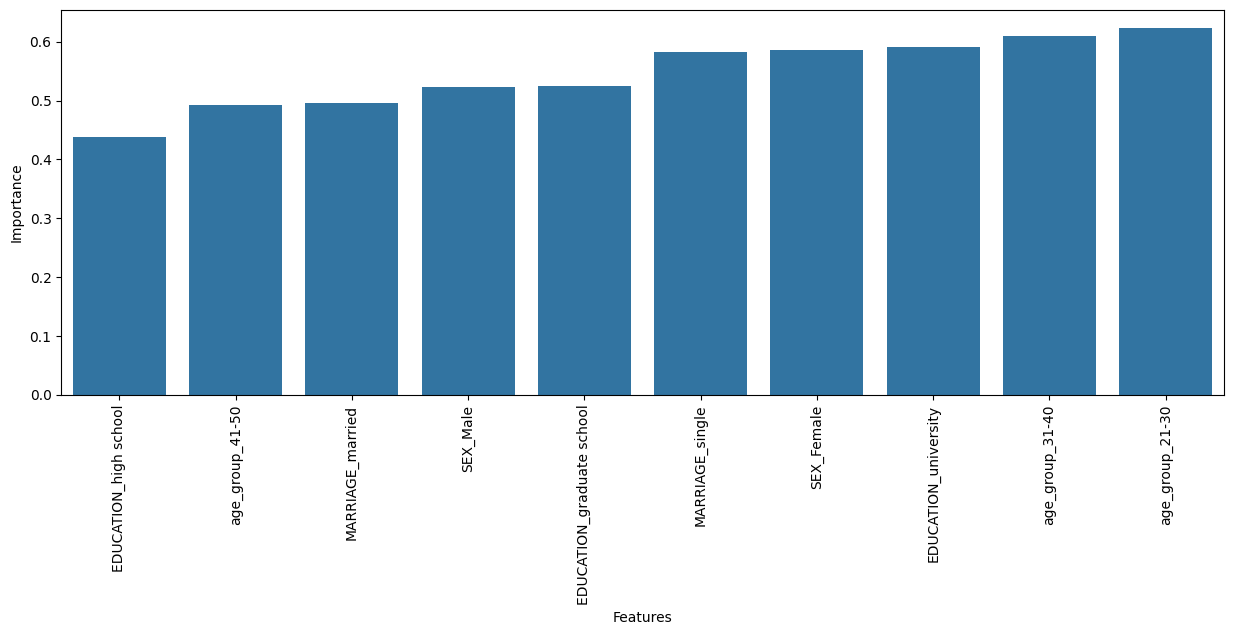

In [ ]:
#Visualización de la importancia de la característica
imp_feat = imp_feat[imp_feat['Importance']>0]
imp_feat = imp_feat.sort_values('Importance')
plt.figure(figsize = (15,5))
print(f'==================================Feature Importance=======================\n\n{optimal_log_model}\
\n===========================================================================\n')
sns.barplot(data = imp_feat , x = imp_feat.Features , y  = 'Importance')
plt.xticks(rotation = 90);


In [ ]:
#obteniendo el mejor Parámetro del modelo
grid_log_model.best_params_

{'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'}

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creacion de modelo DecisionTree
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes = 45 , criterion = 'entropy')
# entrenando y evaluando modelo DecisionTree
run_evaluate_model(DecisionTree,scaled_x_train,scaled_x_test,y_train,y_test)

Matriz de puntuaciones para el entrenamiento
********************************************************************************
The accuracy is  0.82765508189237
The precision is  0.8932391662095447
The recall is  0.7439748715019988
The f1 is  0.8118028291892566
the auc  is  0.8275930470648679

confusion_matrix 
 [[15979  1557]
 [ 4483 13027]]

Informe de clasificación

              precision    recall  f1-score   support

           0       0.78      0.91      0.84     17536
           1       0.89      0.74      0.81     17510

    accuracy                           0.83     35046
   macro avg       0.84      0.83      0.83     35046
weighted avg       0.84      0.83      0.83     35046



Matriz de puntuaciones para el probado
********************************************************************************
The accuracy is  0.829823660332135
The precision is  0.8988856789104416
The recall is  0.7441065937820294
The f1 is  0.8142056074766355
the auc  is  0.8300148617503146

confusion_m

In [ ]:
DecisionTree.feature_importances_

array([0.        , 0.00415303, 0.06680424, 0.27698813, 0.        ,
       0.00624183, 0.02136281, 0.        , 0.00315252, 0.00297092,
       0.        , 0.0020564 , 0.00208373, 0.        , 0.0060574 ,
       0.03429902, 0.        , 0.        , 0.        , 0.        ,
       0.06159772, 0.29797306, 0.00189484, 0.        , 0.        ,
       0.00236107, 0.13953768, 0.04501199, 0.02545361, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

==========================Importancia de las características============================

 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=45)  



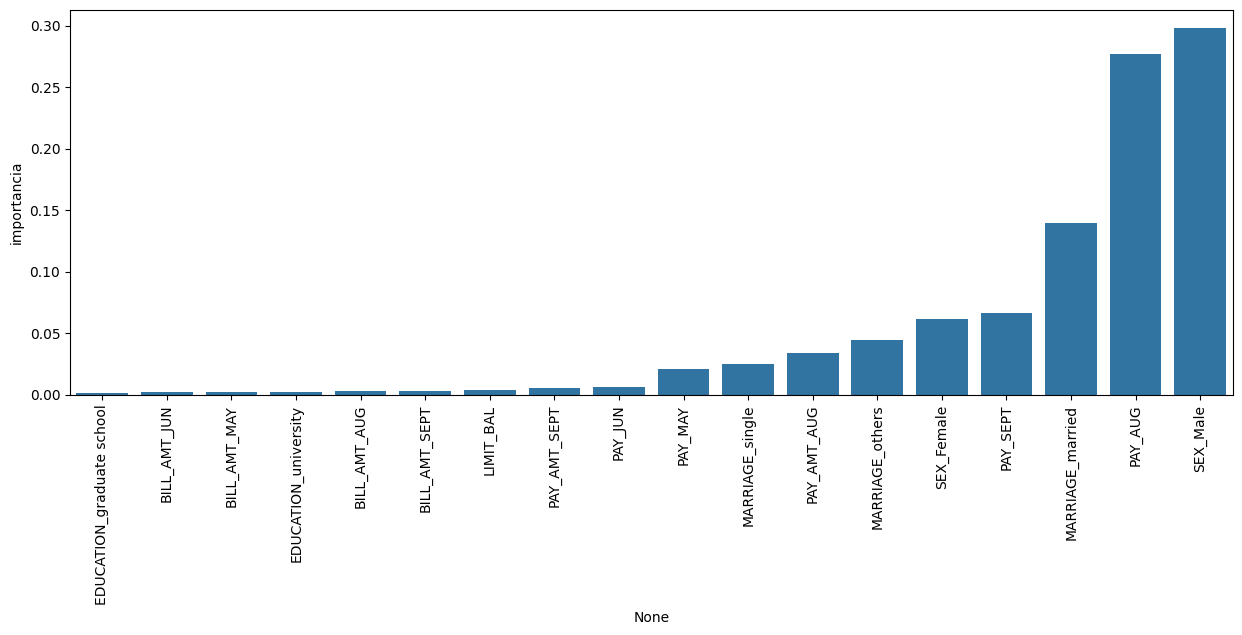

In [ ]:
get_features_importance(DecisionTree,x_train)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [ ]:
# entrenando y evaluando modelo Random forest
run_evaluate_model(rfc_model,scaled_x_train,scaled_x_test,y_train,y_test)

Matriz de puntuaciones para el entrenamiento
********************************************************************************
The accuracy is  1.0
The precision is  1.0
The recall is  1.0
The f1 is  1.0
the auc  is  1.0

confusion_matrix 
 [[17536     0]
 [    0 17510]]

Informe de clasificación

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17536
           1       1.00      1.00      1.00     17510

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046



Matriz de puntuaciones para el probado
********************************************************************************
The accuracy is  0.8749357986646122
The precision is  0.9057823757620543
The recall is  0.8375469764263751
The f1 is  0.8703292801988107
the auc  is  0.8750191985769487

confusion_matrix 
 [[5318  510]
 [ 951 4903]]

Informe de clasificación

          

### Implementación de gridsearch para el ajuste de hiperparámetros en Random Forest

In [ ]:
# Encontrar los mejores parámetros para rfc_model por GridsearchCV
grid_values = {'n_estimators':[100,125,150] , 'max_depth' : [7,10,15] , 'criterion' : ['entropy']}
grid_rfc_model = GridSearchCV(estimator = rfc_model,param_grid = grid_values ,scoring = 'balanced_accuracy' , cv = 3 , verbose = 5 , n_jobs = -1 )

In [ ]:
#entrenamiento y evaluación del RandomForest con ajuste de hiperparámetros
run_evaluate_model(grid_rfc_model,scaled_x_train,scaled_x_test,y_train,y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Matriz de puntuaciones para el entrenamiento
********************************************************************************
The accuracy is  0.9486674656166182
The precision is  0.9902639955064595
The recall is  0.9061679040548258
The f1 is  0.9463513553812662
the auc  is  0.948635959326683

confusion_matrix 
 [[17380   156]
 [ 1643 15867]]

Informe de clasificación

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17536
           1       0.99      0.91      0.95     17510

    accuracy                           0.95     35046
   macro avg       0.95      0.95      0.95     35046
weighted avg       0.95      0.95      0.95     35046



Matriz de puntuaciones para el probado
********************************************************************************
The accuracy is  0.8674028419791132
The precision is  0.9066691857169847
The recall is  0.8197813460881449
The f1 is  0

In [ ]:
#Obtener el mejor parámetro de Random Forest
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 125}

In [ ]:
#Obtener el mejor estimador para Random Forest
grid_rfc_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=125)

In [ ]:
#Almacenamiento del mejor estimador en varibale
optimal_rfc_model = grid_rfc_model.best_estimator_

==========================Importancia de las características============================

 RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=125)  



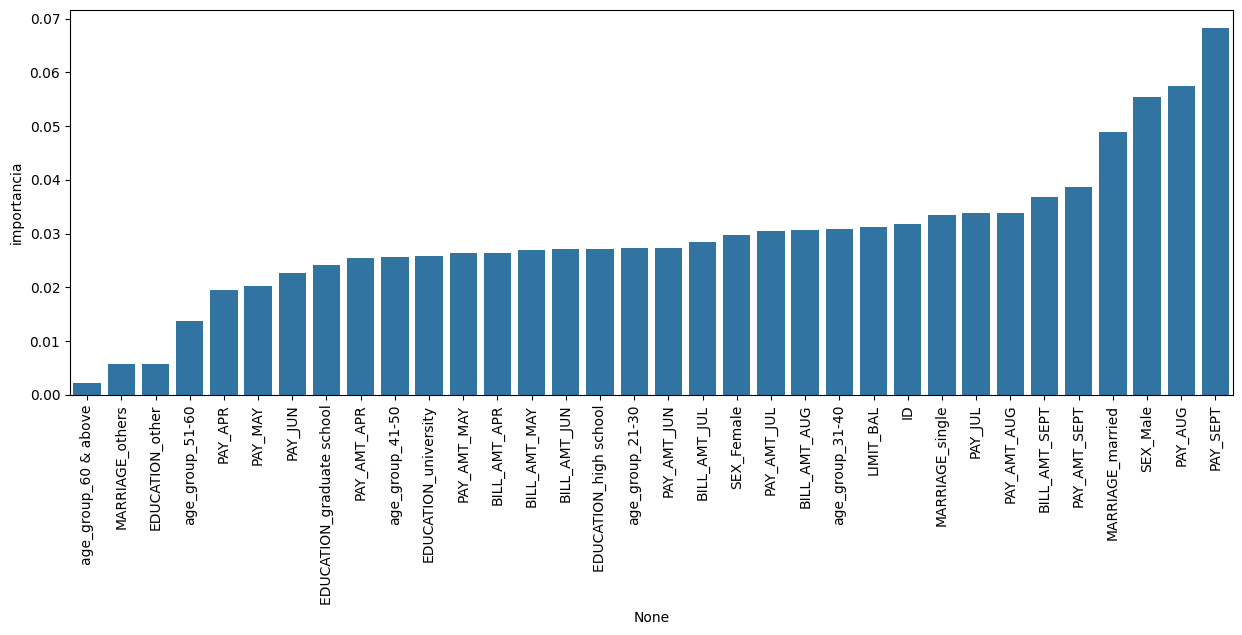

In [ ]:
#Visualización de la importancia de la característica de la variable para el bosque aleatorio
get_features_importance(optimal_rfc_model,x_train)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()

In [ ]:
# entrenando y evaluendo modelo SVC
run_evaluate_model(svc_model,scaled_x_train,scaled_x_test,y_train,y_test)

Matriz de puntuaciones para el entrenamiento
********************************************************************************
The accuracy is  0.8756491468355875
The precision is  0.9487511942131841
The recall is  0.7940034266133638
The f1 is  0.8645069021266012
the auc  is  0.8755886202409884

confusion_matrix 
 [[16785   751]
 [ 3607 13903]]

Informe de clasificación

              precision    recall  f1-score   support

           0       0.82      0.96      0.89     17536
           1       0.95      0.79      0.86     17510

    accuracy                           0.88     35046
   macro avg       0.89      0.88      0.87     35046
weighted avg       0.89      0.88      0.87     35046



Matriz de puntuaciones para el probado
********************************************************************************
The accuracy is  0.869542886492039
The precision is  0.94824016563147
The recall is  0.7823710283566792
The f1 is  0.8573567952077873
the auc  is  0.8697373329841048

confusion_m

### Ajuste de hiperparámetros para SVM

In [ ]:
params = {'C' : [0.1,1,10] , 'kernel':['rbf']}
svc_grid_model = GridSearchCV(svc_model,param_grid = params,scoring = 'recall')

In [ ]:
run_evaluate_model(svc_grid_model,scaled_x_train,scaled_x_test,y_train,y_test)

Matriz de puntuaciones para el entrenamiento
********************************************************************************
The accuracy is  0.8914569423044
The precision is  0.9552883337762423
The recall is  0.8211878926327812
The f1 is  0.8831767090473558
the auc  is  0.891404849601062

confusion_matrix 
 [[16863   673]
 [ 3131 14379]]

Informe de clasificación

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     17536
           1       0.96      0.82      0.88     17510

    accuracy                           0.89     35046
   macro avg       0.90      0.89      0.89     35046
weighted avg       0.90      0.89      0.89     35046



Matriz de puntuaciones para el probado
********************************************************************************
The accuracy is  0.8686012669063516
The precision is  0.9381213227835261
The recall is  0.7898872565766997
The f1 is  0.8576462950941296
the auc  is  0.8687768472313836

confusion_ma

In [ ]:
#obtener el mejor estimador
svc_grid_model.best_estimator_

SVC(C=10)

In [ ]:
svc_grid_model.best_params_

{'C': 10, 'kernel': 'rbf'}

---
#XGboost
---

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# crear modelo XGBRegressor
xgboost_model = XGBClassifier()

In [ ]:
run_evaluate_model(xgboost_model,scaled_x_train,scaled_x_test,y_train,y_test)

Matriz de puntuaciones para el entrenamiento
********************************************************************************
The accuracy is  0.9272670204873594
The precision is  0.9764953181731321
The recall is  0.8754997144488863
The f1 is  0.9232436989972598
the auc  is  0.9272286437207935

confusion_matrix 
 [[17167   369]
 [ 2180 15330]]

Informe de clasificación

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     17536
           1       0.98      0.88      0.92     17510

    accuracy                           0.93     35046
   macro avg       0.93      0.93      0.93     35046
weighted avg       0.93      0.93      0.93     35046



Matriz de puntuaciones para el probado
********************************************************************************
The accuracy is  0.5063345317582606
The precision is  0.5037464473344243
The recall is  0.9991458831568159
The f1 is  0.6697967363298024
the auc  is  0.5052352614136859

confusio

### Ajuste de hiperparámetros para Xgboost



In [ ]:
# encontrar los mejores parámetros para XGBRegressor por gridsearchcv
params = {'n_estimators':[50,100,150] , 'max_depth':[3,5,9]}
grid_xgb_model = GridSearchCV(estimator =xgboost_model , param_grid=params , cv = 5 , verbose = 5 , scoring = 'recall' , n_jobs = -1)

In [ ]:
# training and evaluating the xgb_grid
run_evaluate_model(grid_xgb_model,scaled_x_train,scaled_x_test,y_train,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Matriz de puntuaciones para el entrenamiento
********************************************************************************
The accuracy is  0.9968898019745477
The precision is  0.9993113342898134
The recall is  0.9944603083952027
The f1 is  0.9968799198511521
the auc  is  0.99688800091293

confusion_matrix 
 [[17524    12]
 [   97 17413]]

Informe de clasificación

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17536
           1       1.00      0.99      1.00     17510

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046



Matriz de puntuaciones para el probado
********************************************************************************
The accuracy is  0.5044512925868858
The precision is  0.5027937763259692
The recall is  0.9991458831568159
The f1 is  0.

In [ ]:
#obteniendo el mejor estimador
grid_xgb_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
optimal_xgboost = grid_xgb_model.best_estimator_

==========================Importancia de las características============================

 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)  



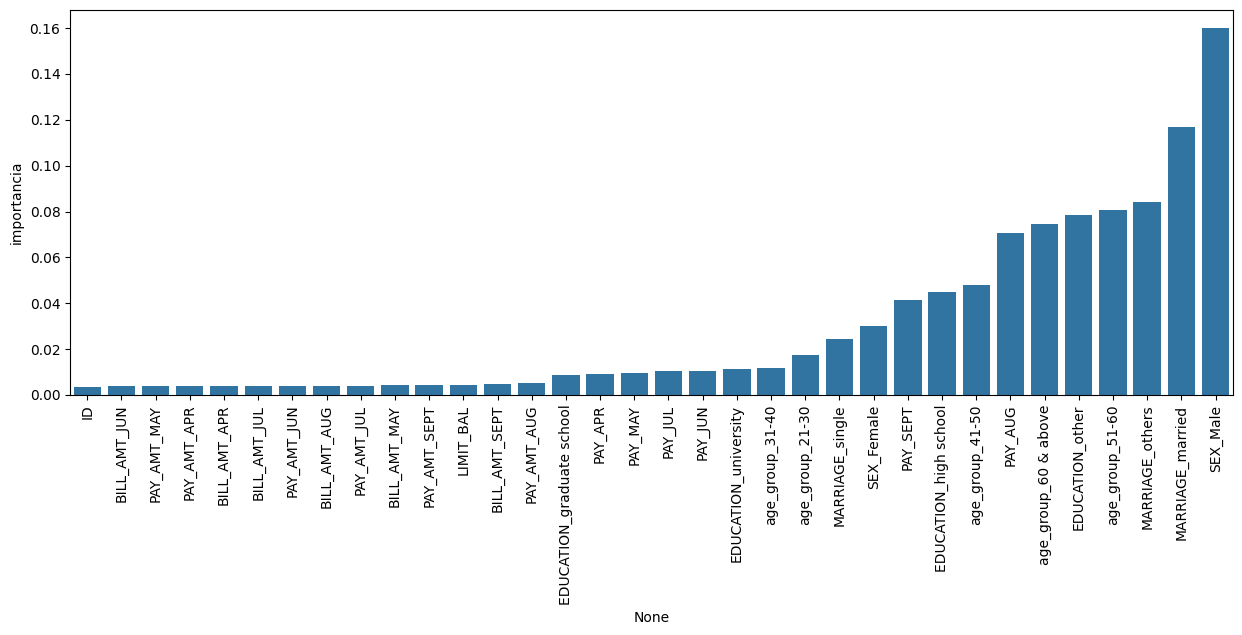

In [ ]:
get_features_importance(optimal_xgboost,x_train)

---
# CatBoost
---

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 103.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
from catboost import CatBoostClassifier

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
cb_model = CatBoostClassifier(verbose=0)

In [ ]:
cb_model = CatBoostClassifier()

In [ ]:
# entrenando y evaluendo modelo cb
run_evaluate_model(cb_model,x_train,x_test,y_train,y_test)

Learning rate set to 0.047043
0:	learn: 0.6677809	total: 55.1ms	remaining: 55s
1:	learn: 0.6344401	total: 60.8ms	remaining: 30.3s
2:	learn: 0.6043733	total: 66ms	remaining: 21.9s
3:	learn: 0.5704620	total: 71.7ms	remaining: 17.9s
4:	learn: 0.5487333	total: 77.2ms	remaining: 15.4s
5:	learn: 0.5290532	total: 83ms	remaining: 13.8s
6:	learn: 0.5113479	total: 88.9ms	remaining: 12.6s
7:	learn: 0.5011216	total: 94.5ms	remaining: 11.7s
8:	learn: 0.4928376	total: 100ms	remaining: 11s
9:	learn: 0.4743178	total: 106ms	remaining: 10.4s
10:	learn: 0.4623108	total: 111ms	remaining: 10s
11:	learn: 0.4564876	total: 117ms	remaining: 9.64s
12:	learn: 0.4456696	total: 123ms	remaining: 9.32s
13:	learn: 0.4367820	total: 129ms	remaining: 9.1s
14:	learn: 0.4286435	total: 135ms	remaining: 8.85s
15:	learn: 0.4233614	total: 140ms	remaining: 8.62s
16:	learn: 0.4198335	total: 146ms	remaining: 8.43s
17:	learn: 0.4158072	total: 151ms	remaining: 8.26s
18:	learn: 0.4132390	total: 157ms	remaining: 8.11s
19:	learn: 0.4

### Ajuste de hiperparámetros para Catboost



In [ ]:
# encontrar los mejores parámetros para CatBoostClassifier por gridsearchcv
params  = {'n_estimators' : [50,100,150]  , 'max_depth':[3,5,9]}
grid_cb_model = GridSearchCV(estimator = cb_model , param_grid = params , cv = 3 , verbose = 0 , n_jobs = -1 , scoring = 'recall')

In [ ]:
# entrenamiento y evaluación del modelo Catboost con ajuste de hiperparámetros
run_evaluate_model(grid_cb_model,x_train,x_test,y_train,y_test)

Learning rate set to 0.267929
0:	learn: 0.4964773	total: 18.1ms	remaining: 2.69s
1:	learn: 0.4148735	total: 33.2ms	remaining: 2.45s
2:	learn: 0.3815215	total: 47.9ms	remaining: 2.35s
3:	learn: 0.3646448	total: 62.4ms	remaining: 2.28s
4:	learn: 0.3404382	total: 77.3ms	remaining: 2.24s
5:	learn: 0.3286982	total: 92.8ms	remaining: 2.23s
6:	learn: 0.3240852	total: 107ms	remaining: 2.19s
7:	learn: 0.3202299	total: 122ms	remaining: 2.16s
8:	learn: 0.3174116	total: 136ms	remaining: 2.13s
9:	learn: 0.3142408	total: 150ms	remaining: 2.1s
10:	learn: 0.3016769	total: 164ms	remaining: 2.07s
11:	learn: 0.2993061	total: 178ms	remaining: 2.05s
12:	learn: 0.2966542	total: 193ms	remaining: 2.04s
13:	learn: 0.2937440	total: 209ms	remaining: 2.03s
14:	learn: 0.2915557	total: 224ms	remaining: 2.02s
15:	learn: 0.2891953	total: 240ms	remaining: 2.01s
16:	learn: 0.2873653	total: 254ms	remaining: 1.99s
17:	learn: 0.2857118	total: 269ms	remaining: 1.97s
18:	learn: 0.2832218	total: 285ms	remaining: 1.96s
19:	le

In [ ]:
#obteniendo mejor estimador
optimal_catboost_model = grid_cb_model.best_estimator_

In [ ]:
#obtener la importancia de la característica
grid_cb_model.best_estimator_.feature_importances_

array([2.52198521, 2.6092883 , 2.37108797, 0.67726423, 0.62014332,
       1.14272283, 0.46970172, 0.39796855, 1.99361941, 0.99453138,
       0.79253731, 0.87384801, 0.80249447, 1.02363705, 2.01823909,
       1.81799562, 1.50637258, 1.53133218, 1.36034991, 1.67921616,
       7.25984091, 6.6854743 , 7.77253895, 5.58427926, 1.11762748,
       9.43083784, 5.18249648, 0.55322434, 5.21558508, 8.06657686,
       7.68059467, 5.49802103, 2.38254171, 0.36602581])

==========================Importancia de las características============================




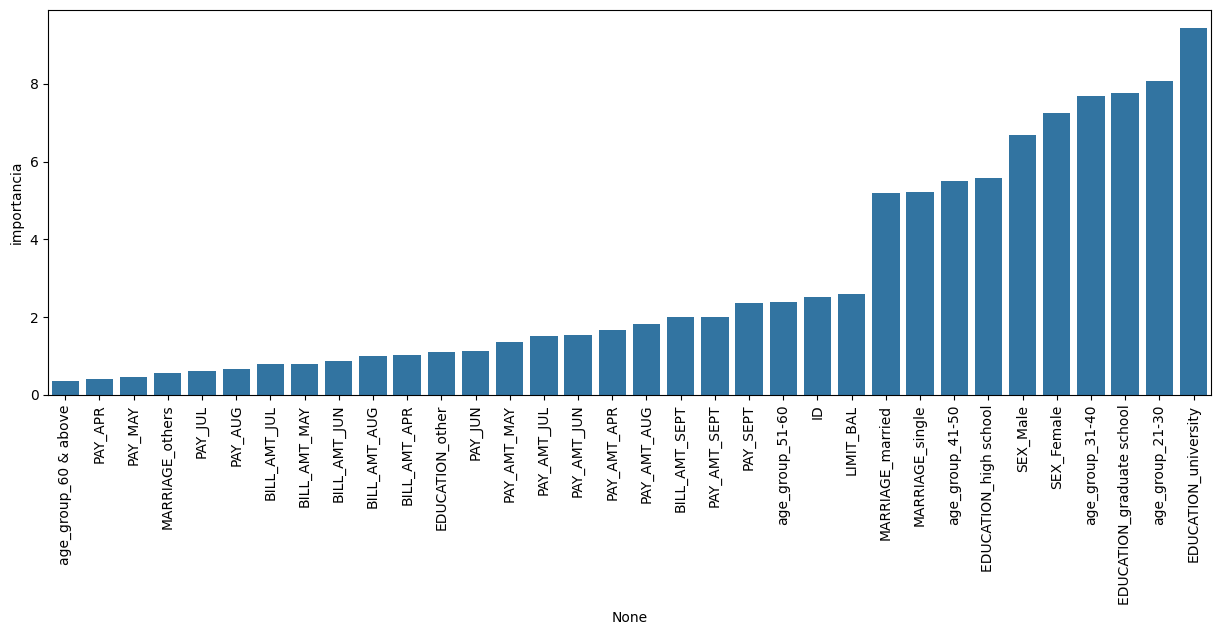

In [ ]:
# visualización de la importancia de las características
get_features_importance(optimal_catboost_model,x_train)

In [ ]:
grid_cb_model.best_params_

{'max_depth': 9, 'n_estimators': 150}

---
# LightGBM
---

In [ ]:
import lightgbm as lgb

In [ ]:
lgbc = lgb.LGBMClassifier()

In [ ]:
# entrenando y evaluando modelo lgbr_grid
run_evaluate_model(lgbc,x_train,x_test,y_train,y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 17510, number of negative: 17536
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3658
[LightGBM] [Info] Number of data points in the train set: 35046, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499629 -> initscore=-0.001484
[LightGBM] [Info] Start training from score -0.001484
Matriz de puntuaciones para el entrenamiento
********************************************************************************
The accuracy is  0.8905153227187126
The precision is  0.9486186757661264
The recall is  0.8255853797829812
The f1 is  0.8828361171333475
the auc  is  0.8904671880666731

confusion_matrix 
 [[16753   783]
 [ 3054 14456]]

Informe de clas

### Ajuste de hiperparámetros para LIGHTGBM

In [ ]:
# encontrar los mejores parámetros para XGBRegressor por gridsearchcv
lgbc_param = {'n_estimators':[100,125,150] , 'max_depth':[7,10,15]}
lgbc_grid = GridSearchCV(estimator = lgbc , param_grid = lgbc_param , verbose = 5 , cv = 3 , scoring = 'recall' , n_jobs = -1)

In [ ]:
# entrenamiento y evaluacin del modelo lgbc_grid
run_evaluate_model(lgbc_grid,x_train,x_test,y_train,y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 17510, number of negative: 17536
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3658
[LightGBM] [Info] Number of data points in the train set: 35046, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499629 -> initscore=-0.001484
[LightGBM] [Info] Start training from score -0.001484
Matriz de puntuaciones para el entrenamiento
********************************************************************************
The accuracy is  0.8900587798892884
The precision is  0.9482113554315721
The recall is  0.8250142775556825
The f1 is  0.8823331806382654
the auc  is  0.8900105603106878

confusion_matrix 
 [[16747   789]
 [ 3064 14446]]

Informe de clasific

==========================Features Importance============================

 LGBMClassifier(max_depth=7, n_estimators=150)  



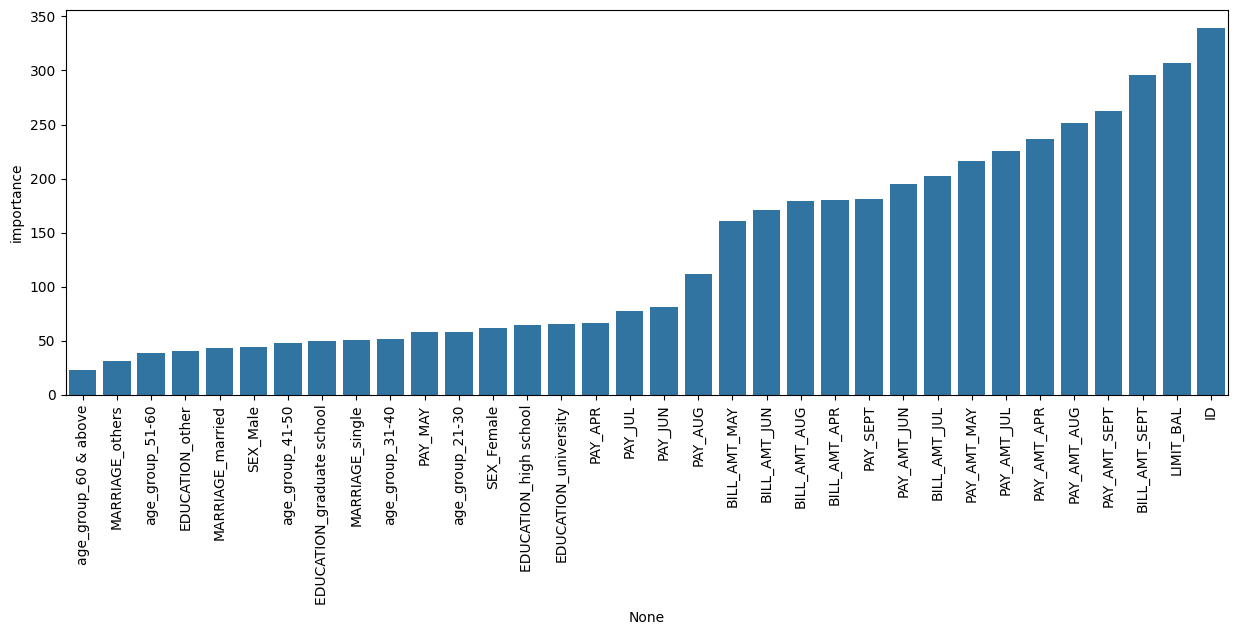

In [ ]:
get_features_importance(lgbc_grid.best_estimator_,x_train)

# ROC curve para todos los modelos
---

In [ ]:
log_reg_best = grid_log_model.best_estimator_
rfc_best = grid_rfc_model.best_estimator_
xgbc_best = grid_xgb_model.best_estimator_
cat_best=grid_cb_model.best_estimator_
lgbc_best = lgbc_grid.best_estimator_

In [ ]:
y_preds_proba_lr = log_reg_best.predict_proba(scaled_x_test)[::,1]
y_preds_proba_dt = DecisionTree.predict_proba(x_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(x_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(x_test)[::,1]
y_preds_proba_cat  = cat_best.predict_proba(x_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(x_test)[::,1]

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (DecisionTree, y_preds_proba_dt),
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (cat_best, y_preds_proba_cat),
                    (lgbc_best, y_preds_proba_lgbc)]

# definir una tabla de resultados como un DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# entrenar los modelos y registra los resultados
# crear una lista para almacenar DataFrames individuales
result_data = []
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    # añadir datos como diccionario a la lista
    result_data.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc})

# concatenar todos los DataFrames de la lista en la result_table
result_table = pd.concat([result_table, pd.DataFrame(result_data)], ignore_index=True)

# establecer el nombre de los clasificadores como etiquetas de índice
result_table.set_index('classifiers', inplace=True)

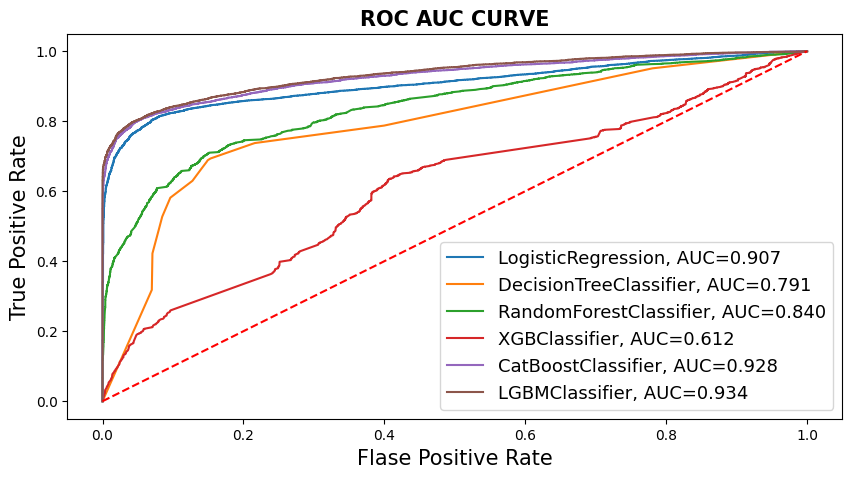

In [ ]:
fig = plt.figure(figsize = (10,5))

for i in result_table.index:
  plt.plot(result_table.loc[i]['fpr'],
           result_table.loc[i]['tpr'],
           label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1] , [0,1] , 'r--')
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC CURVE' , fontweight = 'bold' , fontsize  = 15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(result_table, open('Modelo_Pred.pkl','wb'))

# **Conclusion**

* La mejor **precisión** se obtiene para la **Regresión Logística** y el **Descenso de Gradiente Estocástico**.

* En general, todos los modelos tienen una precisión comparable. Sin embargo, debido a que las clases están desequilibradas (la proporción de tarjetas de crédito no morosas es mayor que la de morosas), esta métrica es engañosa.

* Además, la **precisión** no considera la tasa de **falsos positivos** (tarjetas de crédito no morosas que se predijeron como morosas) ni de **falsos negativos** (tarjetas de crédito morosas que se predijeron incorrectamente como no morosas).

* Ambos casos tienen un impacto negativo en el banco, ya que los **falsos positivos** generan clientes insatisfechos y los **falsos negativos**, pérdidas financieras.

* De la tabla anterior se desprende que el **Clasificador XGBoost Predeterminado**, con valores de **Recall**, **F1-score** y **ROC Score**, es del 96 %, 65 % y 89 %, mientras que el **Clasificador de Árbol de Decisión**, con valores de **Recall**, **F1-score** y **ROC Score**, es del 97 %, 65 % y 90 %.

* El **Clasificador XGBoost Predeterminado** y el **Clasificador de Árbol de Decisión** ofrecen los mejores resultados en **Recall**, **F1-score** y **ROC Score** entre otros algoritmos. Podemos concluir que, según nuestro análisis, estos dos algoritmos son los más eficaces para predecir si una tarjeta de crédito es impaga.